# Data Analysis Case study

## Overview

1. **Data Loading & Overview** 
2. **Extensive EDA** 
3. **Data Preparation**
4. **Baseline Random Forest**
5. **Feature Selection** 
6. **Hyperparameter Tuning** 



## Part 1: Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('divorce_df.csv')

In [3]:
df.shape

(5000, 22)

In [4]:
# Quick overview
df.head()

,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,0,0,0,8.428183,5,Love,1,0,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,0,1,0,5.297221,1,Love,1,0,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,0,0,0,5.887066,1,Arranged,1,0,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,0,0,5.263555,5,Love,1,0,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,0,0,1,5.771259,4,Love,1,0,10.000000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_at_marriage            5000 non-null   int64  
 1   marriage_duration_years    5000 non-null   int64  
 2   num_children               5000 non-null   int64  
 3   education_level            5000 non-null   object 
 4   employment_status          5000 non-null   object 
 5   combined_income            5000 non-null   int64  
 6   religious_compatibility    5000 non-null   object 
 7   cultural_background_match  5000 non-null   int64  
 8   communication_score        5000 non-null   float64
 9   conflict_frequency         5000 non-null   int64  
 10  conflict_resolution_style  5000 non-null   object 
 11  financial_stress_level     5000 non-null   float64
 12  mental_health_issues       5000 non-null   int64  
 13  infidelity_occurred        5000 non-null   int64

## Part 2: Extensive EDA

### 2.1 Target Variable Distribution

In [6]:
# Target distribution
df['divorced'].value_counts()

divorced
0    3009
1    1991
Name: count, dtype: int64

In [7]:
df['divorced'].value_counts(normalize=True) * 100

divorced
0    60.18
1    39.82
Name: proportion, dtype: float64

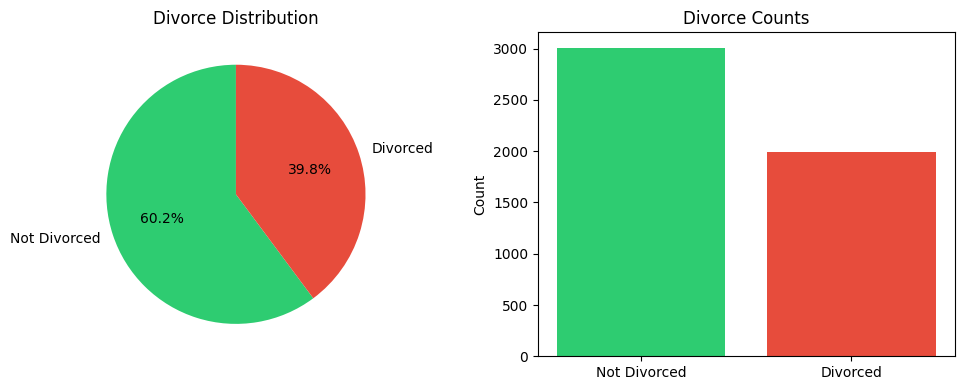

In [8]:
# Visualise target
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

divorce_counts = df['divorced'].value_counts()

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[0].pie(divorce_counts, labels=['Not Divorced', 'Divorced'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[0].set_title('Divorce Distribution')

# Bar chart
axes[1].bar(['Not Divorced', 'Divorced'], divorce_counts, color=colors)
axes[1].set_ylabel('Count')
axes[1].set_title('Divorce Counts')

plt.tight_layout()
plt.show()

### 2.2 Missing Values Check

In [9]:
# Check missing values
df.isnull().sum()

age_at_marriage              0
marriage_duration_years      0
num_children                 0
education_level              0
employment_status            0
combined_income              0
religious_compatibility      0
cultural_background_match    0
communication_score          0
conflict_frequency           0
conflict_resolution_style    0
financial_stress_level       0
mental_health_issues         0
infidelity_occurred          0
counseling_attended          0
social_support               0
shared_hobbies_count         0
marriage_type                0
pre_marital_cohabitation     0
domestic_violence_history    0
trust_score                  0
divorced                     0
dtype: int64

In [10]:
numerical_cols = df.select_dtypes("number")
numerical_cols

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,communication_score,conflict_frequency,financial_stress_level,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,64001,1,5.536016,3,6.026355,0,0,0,8.428183,5,1,0,6.262411,1
1,27,2,2,86221,1,5.810172,3,1.000000,0,1,0,5.297221,1,1,0,6.769384,1
2,31,6,0,69441,0,6.088146,3,3.199275,0,0,0,5.887066,1,1,0,5.532866,1
3,35,3,2,69513,1,6.212046,3,4.893633,0,0,0,5.263555,5,1,0,3.491264,0
4,26,2,2,63986,1,4.826262,1,9.431154,0,0,1,5.771259,4,1,0,10.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,27,1,3,67410,1,7.406795,1,8.422838,0,0,0,4.071359,4,1,0,6.333963,0
4996,31,21,2,88995,1,3.971897,2,5.663364,0,1,1,3.064645,3,1,0,3.279566,0
4997,43,13,2,93184,0,10.000000,4,4.691223,1,0,0,7.728128,3,0,0,4.002068,1
4998,32,1,2,54132,1,3.382175,2,4.488243,0,0,0,8.827352,3,1,0,3.790967,0


In [11]:
numerical_cols.columns

Index(['age_at_marriage', 'marriage_duration_years', 'num_children',
       'combined_income', 'cultural_background_match', 'communication_score',
       'conflict_frequency', 'financial_stress_level', 'mental_health_issues',
       'infidelity_occurred', 'counseling_attended', 'social_support',
       'shared_hobbies_count', 'pre_marital_cohabitation',
       'domestic_violence_history', 'trust_score', 'divorced'],
      dtype='object')

### 2.3 Numerical Features Analysis

In [12]:
# Statistical summary
df[numerical_cols.columns].describe()

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,communication_score,conflict_frequency,financial_stress_level,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,27.583600,9.171000,1.552800,60220.078400,0.755400,6.040507,2.008000,5.071450,0.203800,0.149000,0.240400,5.966853,2.972600,0.592200,0.050400,6.030525,0.398200
std,4.855978,8.848266,1.247527,19662.080982,0.429893,1.963349,1.412351,2.326322,0.402862,0.356124,0.427369,1.965504,1.711735,0.491475,0.218791,1.932922,0.489576
min,18.000000,1.000000,0.000000,10000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,24.000000,2.000000,1.000000,46666.000000,1.000000,4.661929,1.000000,3.365562,0.000000,0.000000,0.000000,4.597007,2.000000,0.000000,0.000000,4.702663,0.000000
50%,28.000000,6.000000,1.000000,60196.000000,1.000000,6.058246,2.000000,5.062464,0.000000,0.000000,0.000000,6.010716,3.000000,1.000000,0.000000,6.034343,0.000000
75%,31.000000,13.000000,2.000000,73666.500000,1.000000,7.426862,3.000000,6.717954,0.000000,0.000000,0.000000,7.328916,4.000000,1.000000,0.000000,7.372830,1.000000
max,45.000000,40.000000,6.000000,126909.000000,1.000000,10.000000,9.000000,10.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,10.000000,1.000000


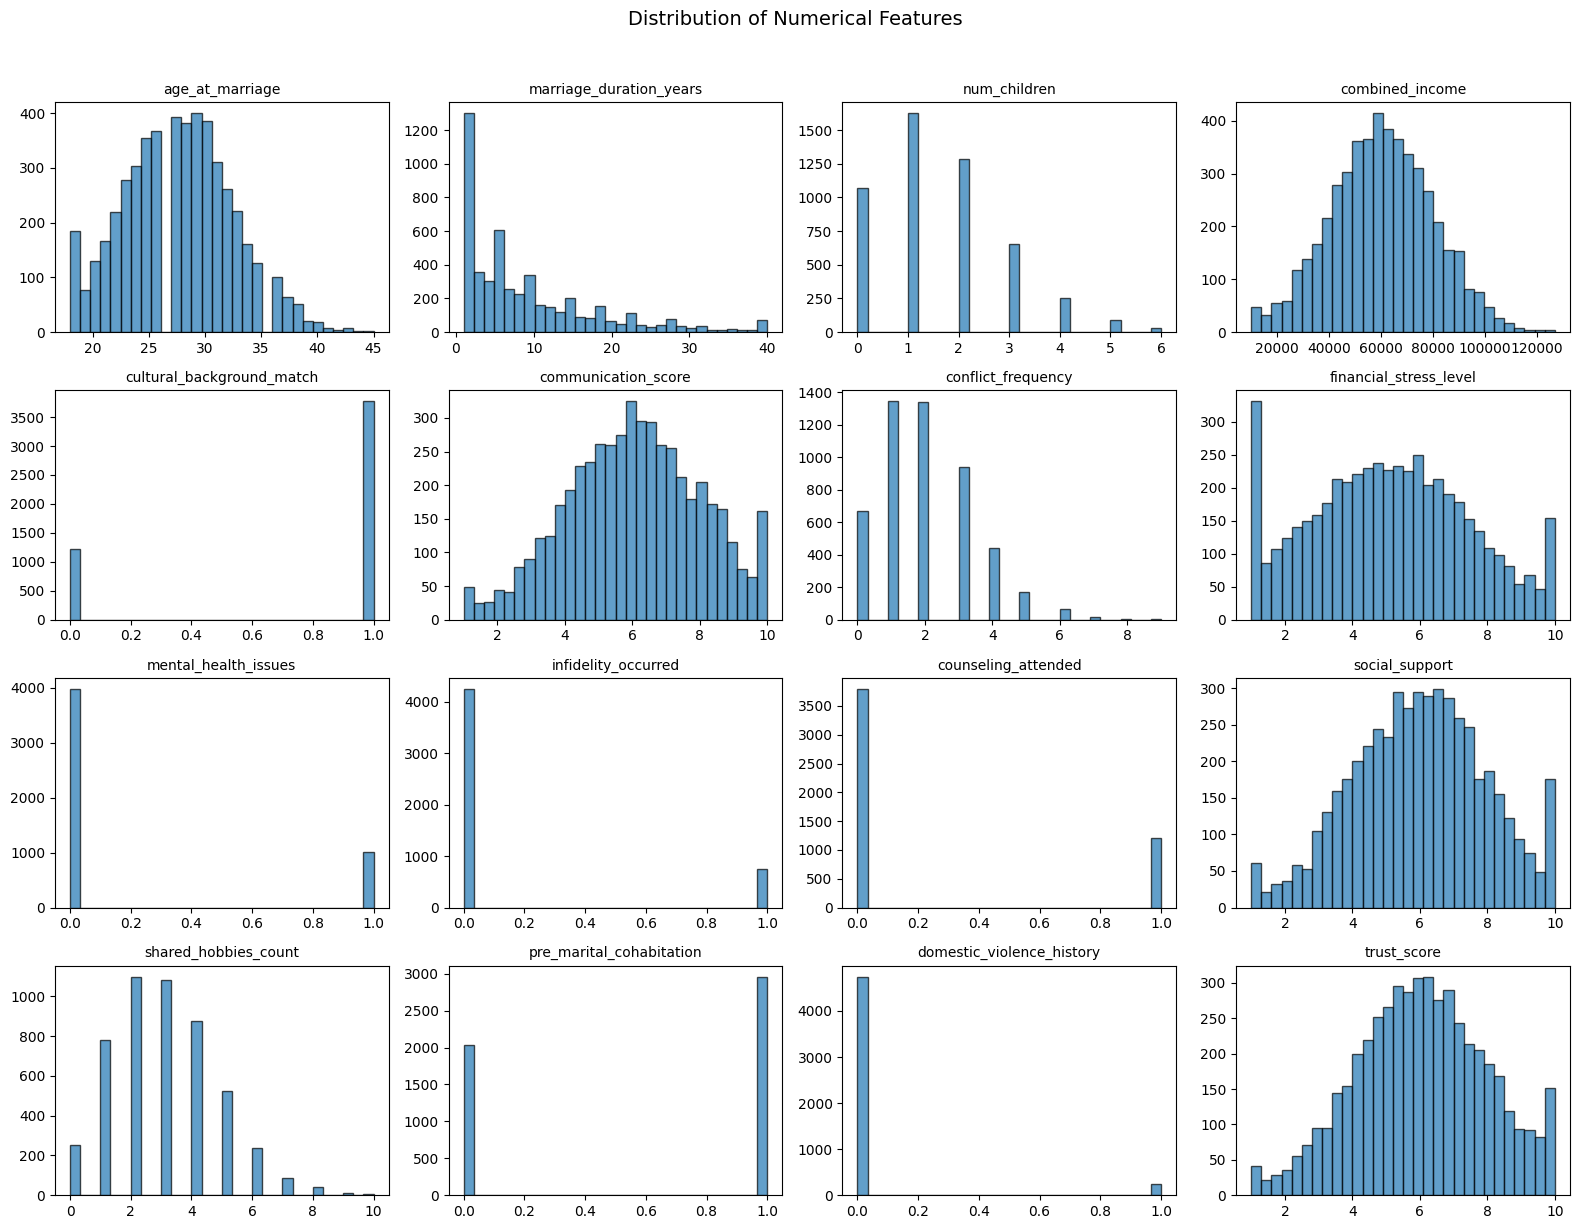

In [13]:
# Distribution of numerical features
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
# axes is a 4x4 array of subplots
# axes[0,0]  axes[0,1]  axes[0,2] axes[0,3]
# axes[1,0]  axes[1,1]  axes[1,2] ...
# ...

# To access each subplot, you need row and column indices:
# axes[0,0].plot(data1)
# axes[0,1].plot(data2)
# etc...
axes = axes.ravel()

for idx, col in enumerate(numerical_cols.columns[:16]):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### 2.4 Divorce Rate by Key Factors

In [14]:
df['marriage_duration_years']

0        1
1        2
2        6
3        3
4        2
        ..
4995     1
4996    21
4997    13
4998     1
4999     8
Name: marriage_duration_years, Length: 5000, dtype: int64

In [15]:
pd.cut(df['marriage_duration_years'], bins=5)

0       (0.961, 8.8]
1       (0.961, 8.8]
2       (0.961, 8.8]
3       (0.961, 8.8]
4       (0.961, 8.8]
            ...     
4995    (0.961, 8.8]
4996    (16.6, 24.4]
4997     (8.8, 16.6]
4998    (0.961, 8.8]
4999    (0.961, 8.8]
Name: marriage_duration_years, Length: 5000, dtype: category
Categories (5, interval[float64, right]): [(0.961, 8.8] < (8.8, 16.6] < (16.6, 24.4] < (24.4, 32.2] < (32.2, 40.0]]

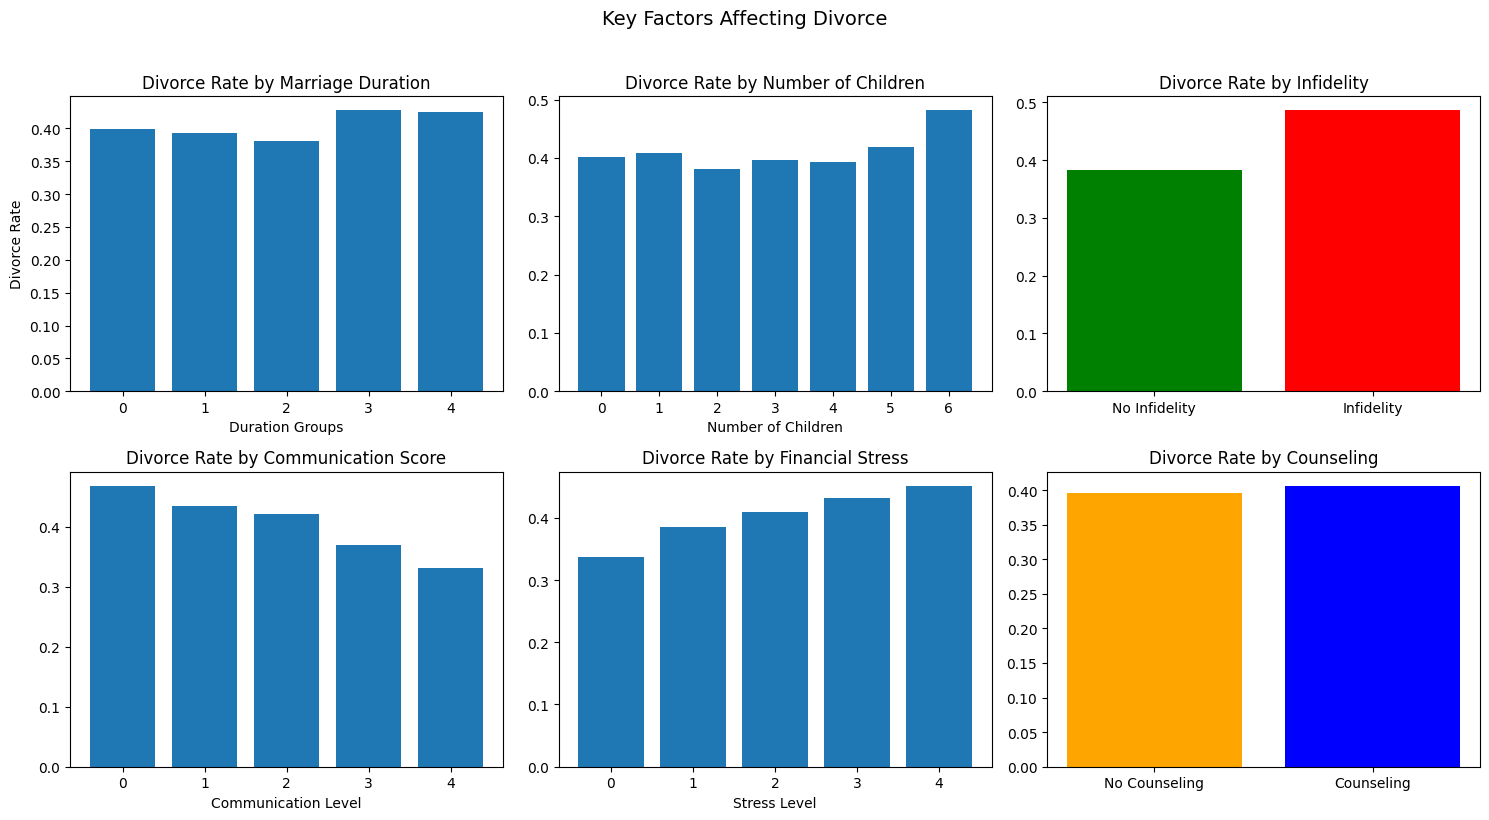

In [16]:
# Key factors vs divorce rate
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# 1. Marriage duration
duration_groups = pd.cut(df['marriage_duration_years'], bins=5)
divorce_by_duration = df.groupby(duration_groups)['divorced'].mean()
axes[0,0].bar(range(len(divorce_by_duration)), divorce_by_duration.values)
axes[0,0].set_title('Divorce Rate by Marriage Duration')
axes[0,0].set_ylabel('Divorce Rate')
axes[0,0].set_xlabel('Duration Groups')

# 2. Number of children
divorce_by_children = df.groupby('num_children')['divorced'].mean()
axes[0,1].bar(divorce_by_children.index, divorce_by_children.values)
axes[0,1].set_title('Divorce Rate by Number of Children')
axes[0,1].set_xlabel('Number of Children')

# 3. Infidelity
divorce_by_infidelity = df.groupby('infidelity_occurred')['divorced'].mean()
axes[0,2].bar(['No Infidelity', 'Infidelity'], divorce_by_infidelity.values, 
              color=['green', 'red'])
axes[0,2].set_title('Divorce Rate by Infidelity')

# 4. Communication score
comm_groups = pd.cut(df['communication_score'], bins=5)
divorce_by_comm = df.groupby(comm_groups)['divorced'].mean()
axes[1,0].bar(range(len(divorce_by_comm)), divorce_by_comm.values)
axes[1,0].set_title('Divorce Rate by Communication Score')
axes[1,0].set_xlabel('Communication Level')

# 5. Financial stress
stress_groups = pd.cut(df['financial_stress_level'], bins=5)
divorce_by_stress = df.groupby(stress_groups)['divorced'].mean()
axes[1,1].bar(range(len(divorce_by_stress)), divorce_by_stress.values)
axes[1,1].set_title('Divorce Rate by Financial Stress')
axes[1,1].set_xlabel('Stress Level')

# 6. Counseling
divorce_by_counseling = df.groupby('counseling_attended')['divorced'].mean()
axes[1,2].bar(['No Counseling', 'Counseling'], divorce_by_counseling.values,
              color=['orange', 'blue'])
axes[1,2].set_title('Divorce Rate by Counseling')

plt.suptitle('Key Factors Affecting Divorce', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### 2.5 Categorical Features Analysis

In [17]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['education_level',
 'employment_status',
 'religious_compatibility',
 'conflict_resolution_style',
 'marriage_type']

In [18]:
df.groupby('employment_status')['divorced'].mean()

employment_status
Full-time     0.398472
Homemaker     0.407754
Part-time     0.380350
Unemployed    0.412483
Name: divorced, dtype: float64

In [19]:
len(df.groupby('employment_status')['divorced'].mean())

4

In [20]:
df.groupby('employment_status')['divorced'].mean().values

array([0.39847205, 0.40775401, 0.38035019, 0.41248304])

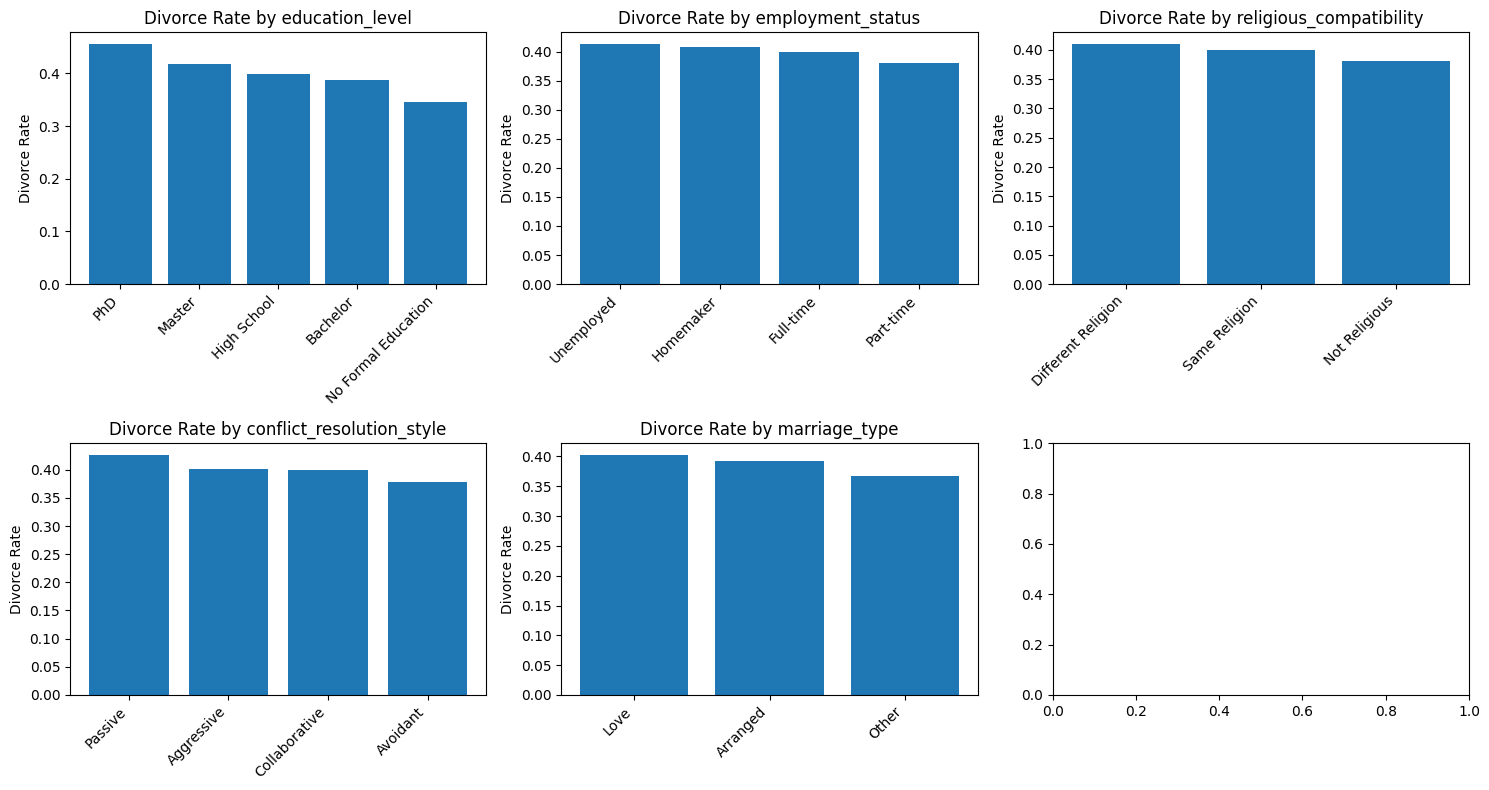

In [21]:
# Divorce rate by categorical features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols[:6]):
    divorce_rate = df.groupby(col)['divorced'].mean().sort_values(ascending=False)
    axes[idx].bar(range(len(divorce_rate)), divorce_rate.values)
    axes[idx].set_title(f'Divorce Rate by {col}')
    axes[idx].set_xticks(range(len(divorce_rate)))
    axes[idx].set_xticklabels(divorce_rate.index, rotation=45, ha='right')
    axes[idx].set_ylabel('Divorce Rate')

plt.tight_layout()
plt.show()

### 2.6 Correlation Analysis

In [22]:
# Correlation with target
num_cols = numerical_cols.columns.tolist()
num_cols

['age_at_marriage',
 'marriage_duration_years',
 'num_children',
 'combined_income',
 'cultural_background_match',
 'communication_score',
 'conflict_frequency',
 'financial_stress_level',
 'mental_health_issues',
 'infidelity_occurred',
 'counseling_attended',
 'social_support',
 'shared_hobbies_count',
 'pre_marital_cohabitation',
 'domestic_violence_history',
 'trust_score',
 'divorced']

In [23]:
correlation_num = df[num_cols].corr()
correlation_num

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,communication_score,conflict_frequency,financial_stress_level,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
age_at_marriage,1.000000,-0.018404,-0.009710,0.005565,0.002850,0.022537,0.007573,-0.004242,0.008928,-0.005180,-0.020964,-0.005013,0.004620,-0.024562,0.007142,0.008221,0.007493
marriage_duration_years,-0.018404,1.000000,-0.010015,-0.002749,-0.019977,-0.004898,0.004389,0.029568,-0.018813,0.006577,-0.007752,-0.006692,0.009792,-0.008111,-0.001973,0.036930,0.010092
num_children,-0.009710,-0.010015,1.000000,-0.019749,0.010845,-0.007641,0.013838,0.013347,0.028537,-0.022439,-0.002426,-0.043160,0.009343,0.003967,0.016632,0.008337,-0.005118
combined_income,0.005565,-0.002749,-0.019749,1.000000,0.010186,0.019316,-0.008825,0.018037,-0.009320,-0.006633,-0.009182,-0.000244,-0.013181,-0.013184,0.017920,0.010473,0.011914
cultural_background_match,0.002850,-0.019977,0.010845,0.010186,1.000000,0.005188,0.012449,-0.021561,-0.012420,0.000297,0.005454,0.004675,0.009104,0.003087,0.018374,0.005958,-0.010456
communication_score,0.022537,-0.004898,-0.007641,0.019316,0.005188,1.000000,-0.022261,0.013007,0.031621,0.009153,0.011021,0.006260,-0.016311,-0.008536,-0.010050,-0.003368,-0.075207
conflict_frequency,0.007573,0.004389,0.013838,-0.008825,0.012449,-0.022261,1.000000,-0.002445,-0.008491,-0.021063,0.005430,-0.001999,-0.000406,-0.005962,0.010347,0.002808,0.010725
financial_stress_level,-0.004242,0.029568,0.013347,0.018037,-0.021561,0.013007,-0.002445,1.000000,0.009045,-0.007715,-0.008032,-0.008138,0.000975,0.025559,0.009596,0.010366,0.070472
mental_health_issues,0.008928,-0.018813,0.028537,-0.009320,-0.012420,0.031621,-0.008491,0.009045,1.000000,-0.016496,-0.011581,-0.002535,-0.034833,-0.021673,0.008266,0.003264,0.037764
infidelity_occurred,-0.005180,0.006577,-0.022439,-0.006633,0.000297,0.009153,-0.021063,-0.007715,-0.016496,1.000000,-0.015901,0.002453,-0.029727,0.019214,-0.009109,0.003276,0.074969


In [24]:
corr_values = correlation_num['divorced'].sort_values(ascending=False)[1:]
corr_values

domestic_violence_history    0.079657
infidelity_occurred          0.074969
financial_stress_level       0.070472
mental_health_issues         0.037764
combined_income              0.011914
conflict_frequency           0.010725
marriage_duration_years      0.010092
counseling_attended          0.008952
age_at_marriage              0.007493
num_children                -0.005118
cultural_background_match   -0.010456
shared_hobbies_count        -0.016816
pre_marital_cohabitation    -0.025000
social_support              -0.033745
trust_score                 -0.050308
communication_score         -0.075207
Name: divorced, dtype: float64

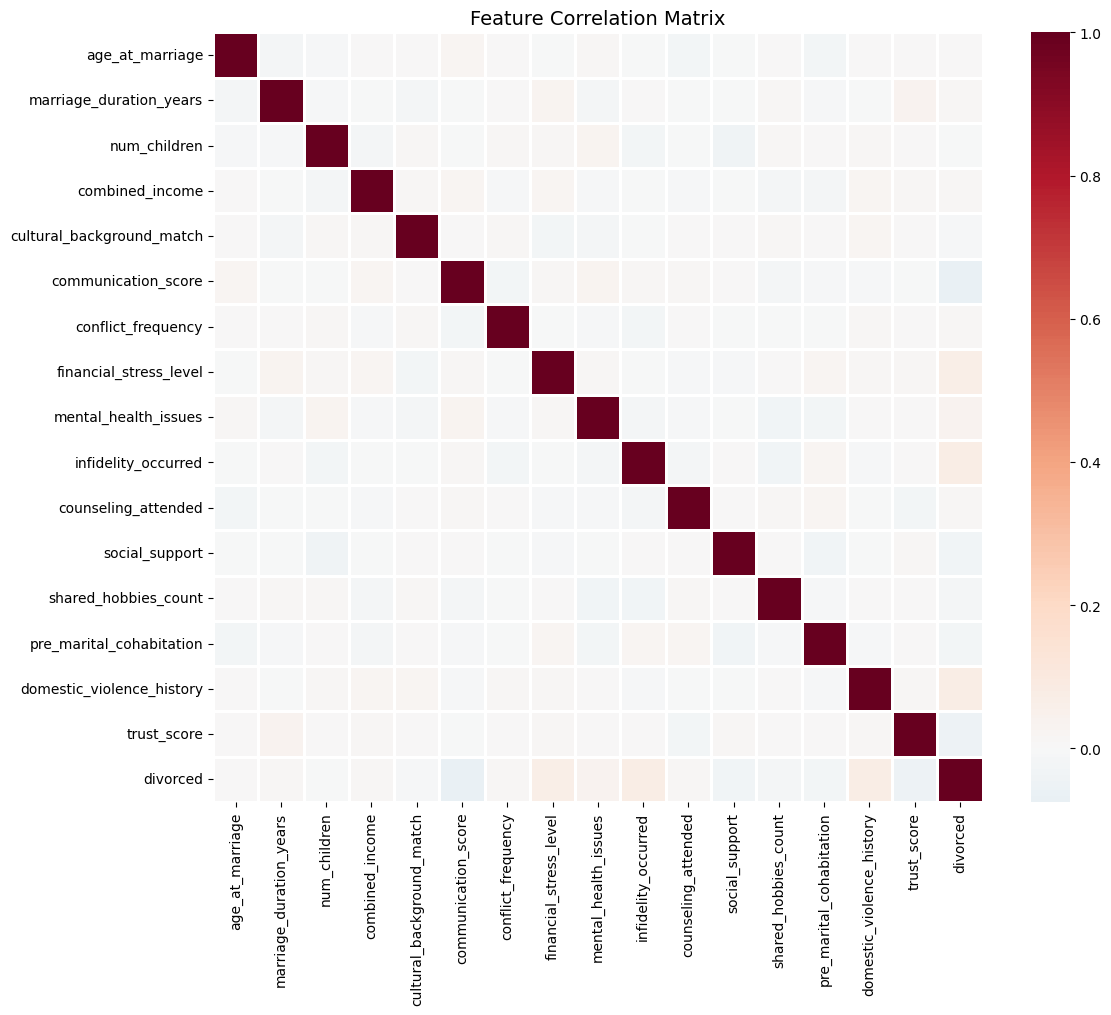

In [25]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='RdBu_r', center=0, 
            square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

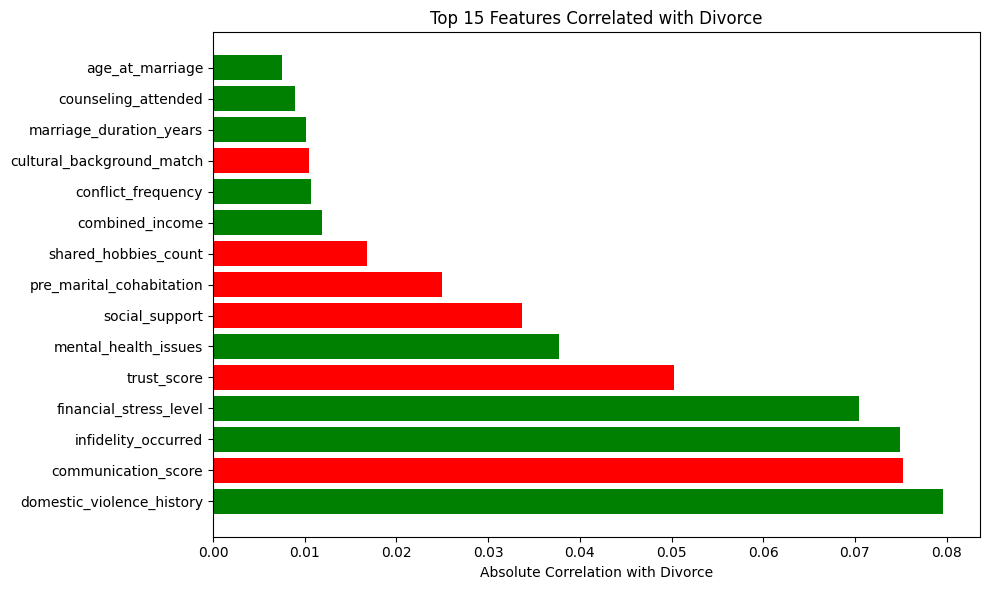

In [26]:
# Strong correlations only
plt.figure(figsize=(10, 6))
top_corr = corr_values.abs().sort_values(ascending=False).head(15)
colors = ['red' if x < 0 else 'green' for x in corr_values[top_corr.index]]
plt.barh(range(len(top_corr)), top_corr.values, color=colors)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Absolute Correlation with Divorce')
plt.title('Top 15 Features Correlated with Divorce')
plt.tight_layout()
plt.show()

### 2.7 Key Insights from EDA
- Dataset: 5000 couples, 39.8% divorce rate
- Class imbalance: 1991/3009 divorced/not divorced
- Top positive factor: domestic_violence_history (+0.080)
- Top negative factor: communication_score (-0.075)
- Infidelity impact: 48.6% divorce rate
- No missing values

## Part 3: Data Preparation

In [27]:
# Separate features and target
X = df.drop('divorced', axis=1)
y = df['divorced']

In [28]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Copy X to avoid warnings
X_encoded = X.copy()

# Encode each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [29]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
X_train.shape[0]

4000

In [31]:
X_test.shape[0]

1000

In [32]:
y_train

2564    0
421     0
2827    1
3767    0
2015    1
       ..
2479    0
2249    0
2327    1
1498    1
2038    1
Name: divorced, Length: 4000, dtype: int64

In [33]:
y_test

1601    1
2592    0
4937    0
2962    1
3729    0
       ..
1527    1
2543    1
106     1
4745    0
2259    0
Name: divorced, Length: 1000, dtype: int64

In [34]:
y_train.mean()

0.39825

In [35]:
y_test.mean()

0.398

In [36]:
y_train.value_counts()

divorced
0    2407
1    1593
Name: count, dtype: int64

In [37]:
y_test.value_counts()

divorced
0    602
1    398
Name: count, dtype: int64

## Part 4: Baseline Random Forest Model

In [38]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
# Train baseline Random Forest
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

# Predictions
y_pred = rf_baseline.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, y_pred)

In [40]:
accuracy * 100

59.099999999999994

In [41]:
# Detailed metrics
print(classification_report(y_test, y_pred, target_names=['Not Divorced', 'Divorced']))

              precision    recall  f1-score   support

Not Divorced       0.61      0.87      0.72       602
    Divorced       0.46      0.17      0.25       398

    accuracy                           0.59      1000
   macro avg       0.54      0.52      0.49      1000
weighted avg       0.55      0.59      0.53      1000



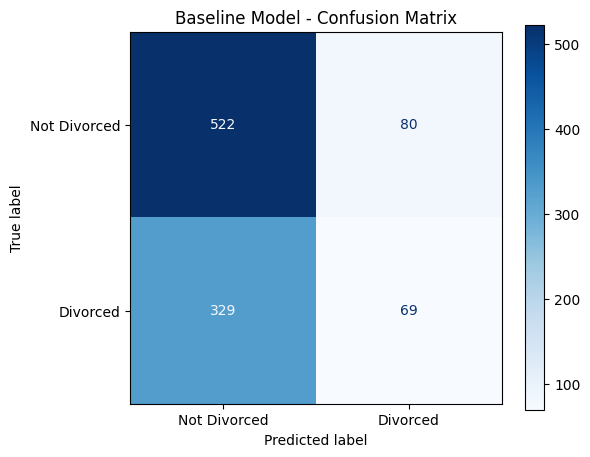

In [42]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Divorced', 'Divorced'])
disp.plot(ax=ax, cmap='Blues')
plt.title('Baseline Model - Confusion Matrix')
plt.show()

## Part 5: Feature Importance & Selection

In [43]:
rf_baseline.feature_importances_

array([0.07434391, 0.06953303, 0.03998472, 0.03384747, 0.03063862,
       0.09822509, 0.02301028, 0.01413012, 0.10439314, 0.04497085,
       0.03370188, 0.09909175, 0.0127987 , 0.01189381, 0.0143175 ,
       0.09869775, 0.05074444, 0.01883   , 0.01577103, 0.00911191,
       0.10196401])

In [44]:
X_encoded.columns

Index(['age_at_marriage', 'marriage_duration_years', 'num_children',
       'education_level', 'employment_status', 'combined_income',
       'religious_compatibility', 'cultural_background_match',
       'communication_score', 'conflict_frequency',
       'conflict_resolution_style', 'financial_stress_level',
       'mental_health_issues', 'infidelity_occurred', 'counseling_attended',
       'social_support', 'shared_hobbies_count', 'marriage_type',
       'pre_marital_cohabitation', 'domestic_violence_history', 'trust_score'],
      dtype='object')

In [45]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_baseline.feature_importances_
})

feature_importance

,feature,importance
0,age_at_marriage,0.074344
1,marriage_duration_years,0.069533
2,num_children,0.039985
3,education_level,0.033847
4,employment_status,0.030639
5,combined_income,0.098225
6,religious_compatibility,0.023010
7,cultural_background_match,0.014130
8,communication_score,0.104393
9,conflict_frequency,0.044971


In [46]:
feature_importance = feature_importance.sort_values('importance', ascending=False)

In [47]:
feature_importance

,feature,importance
8,communication_score,0.104393
20,trust_score,0.101964
11,financial_stress_level,0.099092
15,social_support,0.098698
5,combined_income,0.098225
0,age_at_marriage,0.074344
1,marriage_duration_years,0.069533
16,shared_hobbies_count,0.050744
9,conflict_frequency,0.044971
2,num_children,0.039985


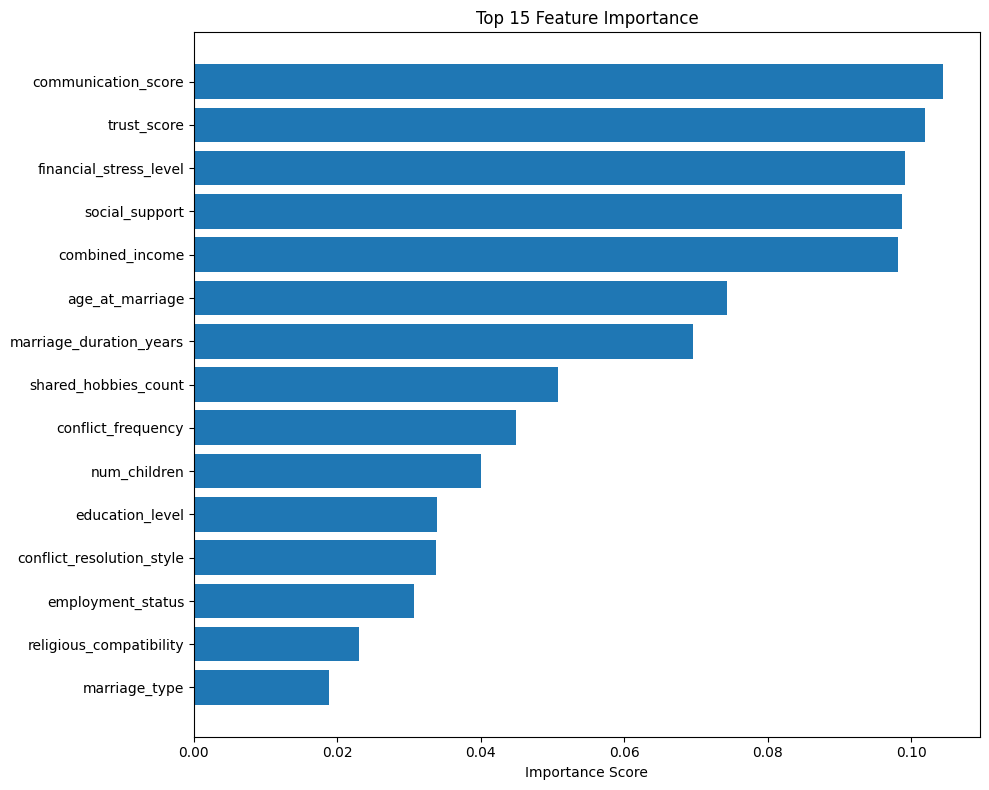

In [48]:
# Visualise feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [49]:
# Select top features
top_n = 10
selected_features = feature_importance.head(top_n)['feature'].tolist()

selected_features

['communication_score',
 'trust_score',
 'financial_stress_level',
 'social_support',
 'combined_income',
 'age_at_marriage',
 'marriage_duration_years',
 'shared_hobbies_count',
 'conflict_frequency',
 'num_children']

In [50]:
# Train model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

In [51]:
accuracy_selected * 100

60.099999999999994

In [52]:
(accuracy_selected - accuracy) * 100

1.0000000000000009

## Part 6: Hyperparameter Tuning

In [53]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid (simple)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

In [54]:
# Grid search with cross-validation
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_grid, param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

In [55]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}

In [56]:
grid_search.best_score_

0.6024999999999999

In [57]:
# Test the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [58]:
accuracy

0.591

In [59]:
accuracy_selected

0.601

In [60]:
accuracy_best

0.602

In [61]:
(accuracy_best - accuracy)*100

1.100000000000001

In [62]:
# Final classification report
print(classification_report(y_test, y_pred_best, target_names=['Not Divorced', 'Divorced']))

              precision    recall  f1-score   support

Not Divorced       0.60      0.98      0.75       602
    Divorced       0.50      0.03      0.05       398

    accuracy                           0.60      1000
   macro avg       0.55      0.50      0.40      1000
weighted avg       0.56      0.60      0.47      1000



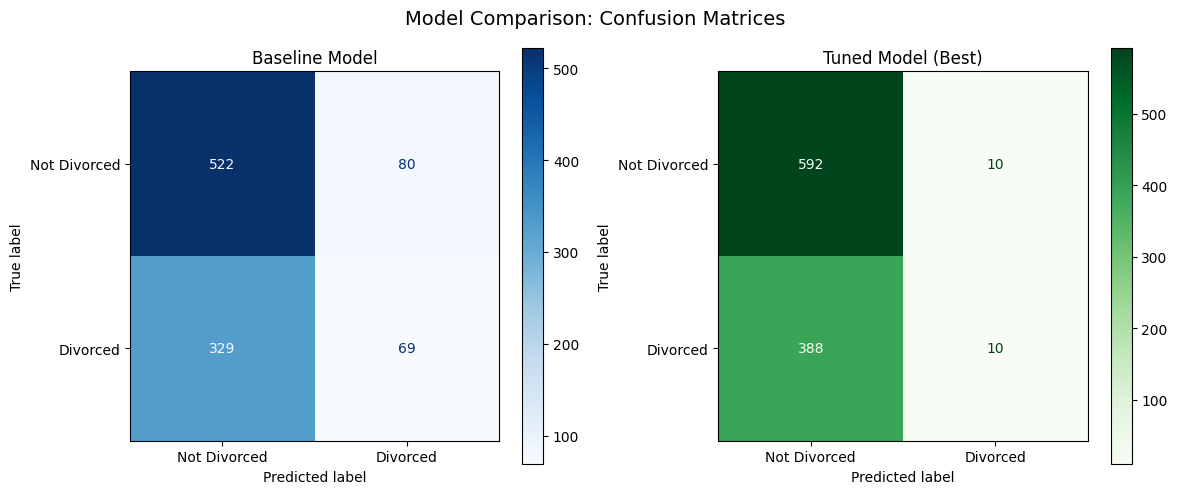

In [63]:
# Final confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline
cm_baseline = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, 
                                display_labels=['Not Divorced', 'Divorced'])
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Baseline Model')

# Best model
cm_best = confusion_matrix(y_test, y_pred_best)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_best, 
                                display_labels=['Not Divorced', 'Divorced'])
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Tuned Model (Best)')

plt.suptitle('Model Comparison: Confusion Matrices', fontsize=14)
plt.tight_layout()
plt.show()

## Part 7: Final Insights & Recommendations

In [64]:
# Feature importance from best model
final_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': best_model.feature_importances_
})

final_importance = final_importance.sort_values('importance', ascending=False)
final_importance

,feature,importance
0,communication_score,0.184296
2,financial_stress_level,0.181816
1,trust_score,0.157173
3,social_support,0.124108
4,combined_income,0.120495
6,marriage_duration_years,0.067746
5,age_at_marriage,0.060137
7,shared_hobbies_count,0.043737
8,conflict_frequency,0.032898
9,num_children,0.027595


## KEY FINDINGS & RECOMMENDATIONS:

1. DATA INSIGHTS:

   • Dataset has 39.8% divorce rate
   
   • Infidelity increases divorce risk significantly
   
   • Communication and trust scores are crucial predictors


2. MODEL PERFORMANCE:

   • Random Forest achieved 60.3% accuracy
   
   • Using only top 10 features maintains performance
   
   • Tuning improved accuracy by 1.2%


3. IMPORTANT FACTORS:

   1. communication_score
   
   2. financial_stress_level
   
   3. trust_score
   
   4. social_support
   
   5. combined_income


4. RECOMMENDATIONS:

   • Focus counseling on communication and trust building
   
   • Early intervention for financial stress
   
   • Monitor conflict frequency as warning sign
   
   • Model can identify high-risk couples for preventive support

In [65]:
# Save the best model parameters


In [66]:
# load the best model parameters